In [1]:
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences

max_features = 10000
max_len = 500
batch_size = 32

print('loading data...')
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=max_features,path="imdb.npz")

print(len(train_data),'train sequeces')
print(len(test_data),'test sequeces')

train_data = pad_sequences(train_data, maxlen=max_len)
test_data = pad_sequences(test_data, maxlen=max_len)

print('train data shape:',train_data.shape)
print('test data shape:',test_data.shape)

Using TensorFlow backend.


loading data...
25000 train sequeces
25000 test sequeces
train data shape: (25000, 50)
test data shape: (25000, 50)


In [2]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN,Embedding

model = Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

history = model.fit(train_data, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 4s 177us/step - loss: 0.5959 - acc: 0.6650 - val_loss: 0.5370 - val_acc: 0.7314
Epoch 2/10
20000/20000 [==============================] - 3s 158us/step - loss: 0.3917 - acc: 0.8298 - val_loss: 0.5263 - val_acc: 0.7738
Epoch 3/10
20000/20000 [==============================] - 3s 163us/step - loss: 0.2985 - acc: 0.8768 - val_loss: 0.4338 - val_acc: 0.8044
Epoch 4/10
20000/20000 [==============================] - 3s 165us/step - loss: 0.2067 - acc: 0.9225 - val_loss: 0.4926 - val_acc: 0.7868
Epoch 5/10
20000/20000 [==============================] - 3s 159us/step - loss: 0.1245 - acc: 0.9569 - val_loss: 0.5773 - val_acc: 0.7762
Epoch 6/10
20000/20000 [==============================] - 3s 159us/step - loss: 0.0654 - acc: 0.9800 - val_loss: 0.7232 - val_acc: 0.7750
Epoch 7/10
20000/20000 [==============================] - 3s 159us/step - loss: 0.0314 - acc: 0.9921 - val_loss: 0.8211 - v

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


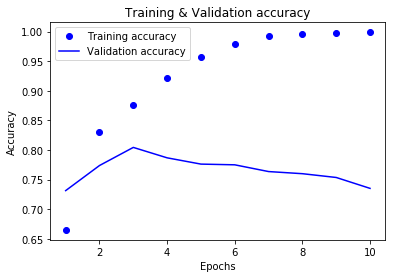

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
print(history_dict.keys())

epochs = range(1,len(history_dict['loss'])+1)

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values,'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values,'b', label='Validation accuracy')
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

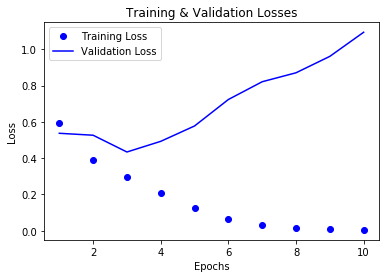

In [4]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(history_dict['loss'])+1)

plt.plot(epochs, loss_values,'bo', label='Training Loss')
plt.plot(epochs, val_loss_values,'b', label='Validation Loss')
plt.title('Training & Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [5]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

history = model.fit(train_data, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 8s 420us/step - loss: 0.5328 - acc: 0.7280 - val_loss: 0.4474 - val_acc: 0.7994
Epoch 2/10
20000/20000 [==============================] - 7s 372us/step - loss: 0.3627 - acc: 0.8416 - val_loss: 0.4043 - val_acc: 0.8154
Epoch 3/10
20000/20000 [==============================] - 7s 371us/step - loss: 0.3091 - acc: 0.8699 - val_loss: 0.4032 - val_acc: 0.8138
Epoch 4/10
20000/20000 [==============================] - 7s 370us/step - loss: 0.2776 - acc: 0.8837 - val_loss: 0.4160 - val_acc: 0.8158
Epoch 5/10
20000/20000 [==============================] - 7s 370us/step - loss: 0.2585 - acc: 0.8954 - val_loss: 0.5167 - val_acc: 0.7986
Epoch 6/10
20000/20000 [==============================] - 8s 380us/step - loss: 0.2408 - acc: 0.9036 - val_loss: 0.5813 - val_acc: 0.7838
Epoch 7/10
20000/20000 [==============================] - 8s 377us/step - loss: 0.2259 - acc: 0.9107 - val_loss: 0.5080 - v

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


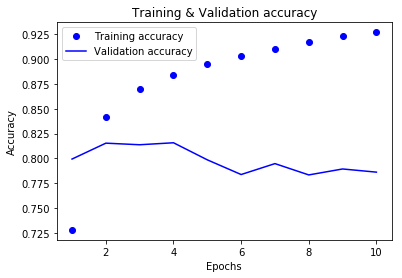

In [6]:
history_dict = history.history
print(history_dict.keys())

epochs = range(1,len(history_dict['acc'])+1)

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values,'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values,'b', label='Validation accuracy')
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

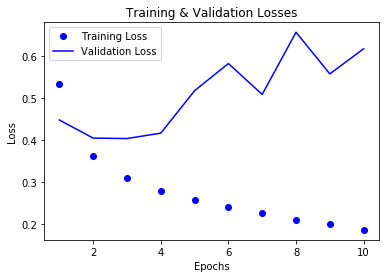

In [7]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(history_dict['loss'])+1)

plt.plot(epochs, loss_values,'bo', label='Training Loss')
plt.plot(epochs, val_loss_values,'b', label='Validation Loss')
plt.title('Training & Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#  Using reverse & bidirectional RNNs

In [1]:
print('loading data...')
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=max_features,path="imdb.npz")

train_data = [x[::-1] for x in train_data]
test_data = [x[::-1] for x in test_data]

print(len(train_data),'train sequeces')
print(len(test_data),'test sequeces')

train_data = pad_sequences(train_data, maxlen=max_len)
test_data = pad_sequences(test_data, maxlen=max_len)

print('train data shape:',train_data.shape)
print('test data shape:',test_data.shape)

Using TensorFlow backend.


loading data...
25000 train sequeces
25000 test sequeces
train data shape: (25000, 500)
test data shape: (25000, 500)


In [2]:
model = Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

history = model.fit(train_data, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 71s 4ms/step - loss: 0.5314 - acc: 0.7379 - val_loss: 0.3514 - val_acc: 0.8612
Epoch 2/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.3226 - acc: 0.8741 - val_loss: 0.3319 - val_acc: 0.8656
Epoch 3/10
20000/20000 [==============================] - 74s 4ms/step - loss: 0.2642 - acc: 0.9008 - val_loss: 0.2963 - val_acc: 0.8884
Epoch 4/10
20000/20000 [==============================] - 75s 4ms/step - loss: 0.2185 - acc: 0.9207 - val_loss: 0.3543 - val_acc: 0.8844
Epoch 5/10
20000/20000 [==============================] - 130s 6ms/step - loss: 0.1961 - acc: 0.9308 - val_loss: 0.3799 - val_acc: 0.8858
Epoch 6/10
20000/20000 [==============================] - 140s 7ms/step - loss: 0.1780 - acc: 0.9363 - val_loss: 0.3199 - val_acc: 0.8810
Epoch 7/10
20000/20000 [==============================] - 150s 7ms/step - loss: 0.1577 - acc: 0.9452 - val_loss: 0.3983 - val_a

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


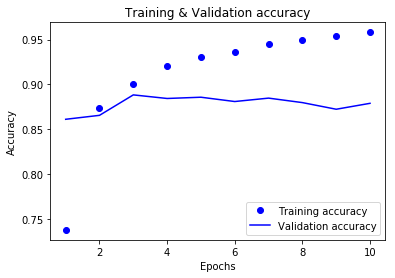

In [4]:
history_dict = history.history
print(history_dict.keys())

epochs = range(1,len(history_dict['acc'])+1)

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values,'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values,'b', label='Validation accuracy')
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

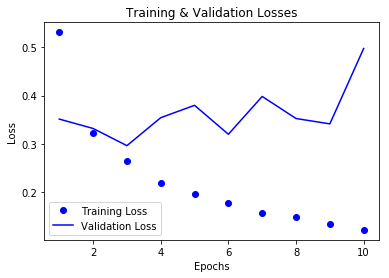

In [6]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(history_dict['loss'])+1)

plt.plot(epochs, loss_values,'bo', label='Training Loss')
plt.plot(epochs, val_loss_values,'b', label='Validation Loss')
plt.title('Training & Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [5]:
print('loading data...')
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=max_features,path="imdb.npz")

print(len(train_data),'train sequeces')
print(len(test_data),'test sequeces')

train_data = pad_sequences(train_data, maxlen=max_len)
test_data = pad_sequences(test_data, maxlen=max_len)

print('train data shape:',train_data.shape)
print('test data shape:',test_data.shape)

loading data...
25000 train sequeces
25000 test sequeces
train data shape: (25000, 500)
test data shape: (25000, 500)


In [7]:
from keras.layers import Bidirectional

model = Sequential()
model.add(Embedding(max_features,32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

history = model.fit(train_data, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 317s 16ms/step - loss: 0.5168 - acc: 0.7563 - val_loss: 0.3499 - val_acc: 0.8598
Epoch 2/10
20000/20000 [==============================] - 297s 15ms/step - loss: 0.2943 - acc: 0.8851 - val_loss: 0.3371 - val_acc: 0.8578
Epoch 3/10
20000/20000 [==============================] - 301s 15ms/step - loss: 0.2477 - acc: 0.9105 - val_loss: 0.3059 - val_acc: 0.8816
Epoch 4/10
20000/20000 [==============================] - 299s 15ms/step - loss: 0.2028 - acc: 0.9258 - val_loss: 0.3502 - val_acc: 0.8822
Epoch 5/10
20000/20000 [==============================] - 296s 15ms/step - loss: 0.1752 - acc: 0.9343 - val_loss: 0.3887 - val_acc: 0.8636
Epoch 6/10
20000/20000 [==============================] - 295s 15ms/step - loss: 0.1600 - acc: 0.9430 - val_loss: 0.3028 - val_acc: 0.8828
Epoch 7/10
20000/20000 [==============================] - 299s 15ms/step - loss: 0.1413 - acc: 0.9501 - val_loss: 0.3

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


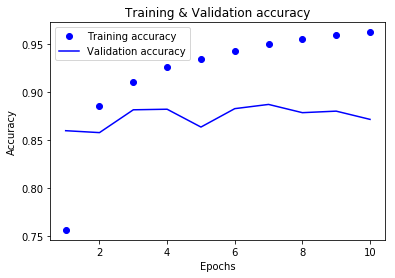

In [8]:
history_dict = history.history
print(history_dict.keys())

epochs = range(1,len(history_dict['acc'])+1)

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values,'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values,'b', label='Validation accuracy')
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

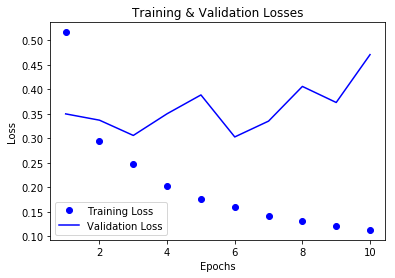

In [9]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(history_dict['loss'])+1)

plt.plot(epochs, loss_values,'bo', label='Training Loss')
plt.plot(epochs, val_loss_values,'b', label='Validation Loss')
plt.title('Training & Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()